Hypothesis Tests (Non-Parametric)
====

## Unit 10, Lecture 2

*Numerical Methods and Statistics*

----

### Reading

Langley: Pages 137-189, 199-211, 230-245

----

#### Prof. Andrew White, April 5 2018

Goals:
---

1. Learn the difference between parametric statistics vs nonparametric statistics
2. Be able to apply the following non-parametric hypothesis tests: Wilcoxon sum of ranks, Wilcoxon signed ranks, Spearman correlaction test
3. Understand how to apply parametric hypothesis tests with discrete values

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import scipy.stats as ss

Detour: Parametric vs. Nonparametric Stastics
====

**Parametric Statistics:** What we've seen before, where we do statistics by assuming the data follows some underlying probability distribution (like normal distribution). Sometimes this is a good assumpetion because of the CLT.

**Nonparametric Statistics:** We do statistics without assuming an equation form for the underlying probability distribution. Typically harder to prove significance here because we have less information due to not assuming probability distribution.

Nonparametric statistics are secret and not widely taught because people belive they are challenging to understand. This is true, but I don't think undergraduates completely understand probability measure spaces but it doesn't stop us from using them.

*From here onwards, most tests will not assume normality and are nonparametric. You won't find these tests in most traditional statistics textbooks*

To do nonparametric statistics, one of the underlying principles is converting measurements into rankings.

In [2]:
d = np.random.rand(10)
print (d)
print (ss.rankdata(d))

[0.70148411 0.96522843 0.41747704 0.8159568  0.02398743 0.14613944
 0.01542925 0.75959105 0.63014733 0.52986675]
[ 7. 10.  4.  9.  2.  3.  1.  8.  6.  5.]


Nonparametric Methods for Comparing Sets of Measurements
====

Wilcoxon's Sum of Ranks Test
====

**Data Type:** Ranks

**Compares:** Two sets of measurements. 

**Null Hypothesis:** The two sets of measurements are from the same distribution

**Conditions:** Unmatched measurements. Unmatched the measurements aren't in pairs and you don't necessarily have the same number

**Related Test 1:** Wilcoxon's Signed Ranks Test for matched data measuring one thing (i.e, temperature)

**Related Test 2:** Spearman's Correlation Test for matched data measuring two things (i.e., temperature and pressure)

**Python:** `scipy.stats.ranksums`

**Hints:** Make sure all data is in the same units!

Example: Were HW 1 and HW 2 from the same distribution?
====

In [3]:
import pandas as pd
data = pd.read_csv('grades.csv')
#get some info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 12 columns):
R1         65 non-null float64
R2         65 non-null float64
R3         65 non-null int64
R5         65 non-null int64
R6         65 non-null int64
HW1        65 non-null float64
HW2        65 non-null float64
HW3        65 non-null float64
HW4        65 non-null float64
HW5        65 non-null float64
HW6        65 non-null float64
Midterm    65 non-null float64
dtypes: float64(9), int64(3)
memory usage: 6.2 KB


I'm going to standardize the homework so that they are all out of 100%. The first row contains perfect scores on each.

In [4]:
data /= data.iloc[0,:]
data *= 100
data.mean(axis=0)

R1         91.794872
R2         89.807692
R3         84.615385
R5         93.846154
R6         81.538462
HW1        82.939560
HW2        80.118343
HW3        74.230769
HW4        83.367730
HW5        73.282648
HW6        75.182595
Midterm    76.130769
dtype: float64

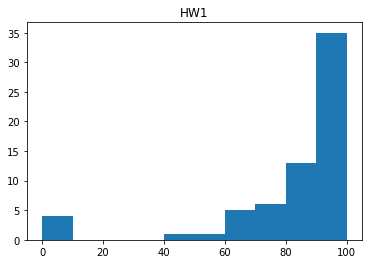

In [5]:
plt.title('HW1')
plt.hist(data.HW1)
plt.show()

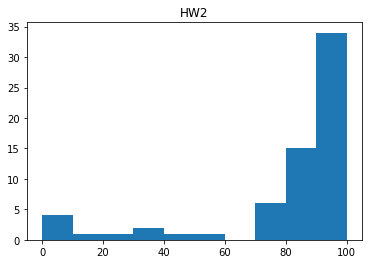

In [6]:
plt.title('HW2')
plt.hist(data.HW2)
plt.show()

In [7]:
ss.ranksums(data['HW1'], data['HW2'])

RanksumsResult(statistic=0.39578610596263436, pvalue=0.6922628274842608)

The $p$-value is 0.70, so we cannot rule out the null hypothesis that they are from the same distribution. What about a more recent difficult homework?

In [8]:
ss.ranksums(data['HW1'], data['HW5'])

RanksumsResult(statistic=2.567953381628151, pvalue=0.010230091290609646)

So HW 1 and HW 5 were significantly different.

Wilcoxon's Signed Rank Test
====

**Data Type:** Ranks

**Compares:** Two sets of measurements

**Null Hypothesis:** The two sets of measurements are from the same distribution

**Conditions:** Measurements are matched. Matched means the data comes in tuples/pairs. More than 6 samples, better to have more than 20.

**Related Test 1:** Wilcoxon's Sum of Ranks Test for unmatched data measuring one thing (i.e, temperature)

**Related Test 2:** Spearman's Correlation Test for matched data measuring two things (i.e., temperature and pressure)

**Python:** `scipy.stats.wilcoxon`

**Hints:** Make sure all data is in the same units!

Since the same people are doing the HW each week, a more accuracte comparison would be to used the Signed Rank Test.

In [9]:
ss.wilcoxon(data.HW1, data.HW2)

WilcoxonResult(statistic=634.5, pvalue=0.08703592427905478)

In [10]:
ss.wilcoxon(data.HW1, data.HW5)

WilcoxonResult(statistic=434.0, pvalue=0.000398645278025264)

Notice that the p-values are lower relative to the unmatched sum of ranks test, meaning have paired data allows us to be more certain in our conclusions. 

Spearman's Correlation Test
====

**Data Type:** Ranks

**Compares:** Two sets of measurements

**Null Hypothesis:** The two sets of measurements are uncorrelated

**Conditions:** Measurements are matched. Matched means the data comes in tuples/pairs. The measurements are of different things

**Related Test 1:** Wilcoxon's Sum of Ranks Test for unmatched data measuring one thing (i.e, temperature)

**Related Test 2:** Wilcoxon's Signed Ranks Test for matched data measuring one thing (i.e, temperature)

**Python:** `scipy.stats.spearmanr`

Example: Is doing well on homework correlated with doing well on the midterm?
====

First, let's get the average grade on the homeworks. The spreadsheet has 6 homeworks

In [11]:
#build a list of all the HW indices
index = []
for i in range(1,7):
    index.append('HW{}'.format(i))

#access those homeworks and then take the mean along the columns
hw_means = data[index].mean(axis=1)

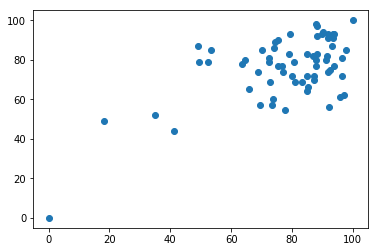

In [12]:
plt.plot(hw_means, data.Midterm, 'o')
plt.show()

In [13]:
ss.spearmanr(hw_means, data.Midterm)

SpearmanrResult(correlation=0.3466347056828196, pvalue=0.004673660991129944)

Remarkable!

In [14]:
np.corrcoef(hw_means, data.Midterm)

array([[1.        , 0.60007556],
       [0.60007556, 1.        ]])

Tests For Counts (Parametric)
====

Poisson's Count Test
====

**Data Type:** Count

**Compares:** Count vs a poisson distributed population

**Null Hypothesis:** The number of observations (count) came from the known population

**Conditions:** Less than 40 samples (for computational simplicity)

**Related Test 1:** $zI$ test, for more than 40 samples

**Python:** Construct an interval and integrate using `scipy.stats.poisson.cdf(x, mu=...)`

**Hints**: Your interval should contain your value and all other extreme values. The interval should go up to infinity or down to 0 depending on if it's higher or lower than the expected value.

Example: Hurricanes per Year
====

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?

We will construct an interval containing all values as extreme as ours. We don't consider a low number of hurricanes to be extreme in this example. *Remember that we want to include the value into this interval.*

First consider only saying that lots of hurricanes is out of the ordininary (not part of the null hypothesis).

$$
P = P(x \geq 15) = 1 - \sum_0^{14} P(x)
$$

In [15]:
print('p-value is', (1 - ss.poisson.cdf(14, mu=6.3)))

p-value is 0.002217122790073134


So we reject the null hypothesis. This is a highly unusual number of hurricanes.